In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load the data
file_path = "C:/Users/Muneer/Desktop/sensor_readings.csv"  # Path to your CSV file
data = pd.read_csv(file_path)

In [12]:
# Preprocessing
X = data[['ADS1115 (0x48) A0', 'ADS1115 (0x48) A1', 'ADS1115 (0x48) A3', 'ADS1115 (0x49) A0', 'ADS1115 (0x49) A1']]
y = data['Label']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# ANN model
def build_ann():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

ann = build_ann()
ann.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
y_pred_ann = ann.predict(X_test)
cm_ann = confusion_matrix(y_test.argmax(axis=1), y_pred_ann.argmax(axis=1))

C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2146 - loss: 2.8924
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6571 - loss: 1.2138
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.7249
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8463 - loss: 0.5714
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8639 - loss: 0.4928
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8679 - loss: 0.4251
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8846 - loss: 0.3830
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 0.3509
Epoch 9/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8939 - loss: 0.3405
Epoch 10/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9024 - loss: 0.3197
Epoch 11/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9090 - loss: 0.3129
Epoch 12/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [14]:
# CNN model
def build_cnn():
    model = Sequential()
    model.add(Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

cnn = build_cnn()
cnn.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)
y_pred_cnn = cnn.predict(X_test_cnn)
cm_cnn = confusion_matrix(y_test.argmax(axis=1), y_pred_cnn.argmax(axis=1))

Epoch 1/20


C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3209 - loss: 2.7127
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7709 - loss: 0.8792
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8271 - loss: 0.6071
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8541 - loss: 0.4934
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.4174
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8820 - loss: 0.3907
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8974 - loss: 0.3517
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8970 - loss: 0.3333
Epoch 9/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9112 - loss: 0.3068
Epoch 10/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9128 - loss: 0.3100
Epoch 11/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9220 - loss: 0.2676
Epoch 12/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [15]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.argmax(axis=1))
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test.argmax(axis=1), y_pred_knn)

# LSTM model
def build_lstm():
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

lstm = build_lstm()
lstm.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)
y_pred_lstm = lstm.predict(X_test_cnn)
cm_lstm = confusion_matrix(y_test.argmax(axis=1), y_pred_lstm.argmax(axis=1))

C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1790 - loss: 3.0915
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5203 - loss: 1.5113
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6824 - loss: 0.9425
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7508 - loss: 0.7346
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7804 - loss: 0.6388
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8169 - loss: 0.5566
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8243 - loss: 0.5146
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8549 - loss: 0.4631
Epoch 9/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8596 - loss: 0.4275
Epoch 10/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8491 - loss: 0.4213
Epoch 11/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8842 - loss: 0.3746
Epoch 12/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

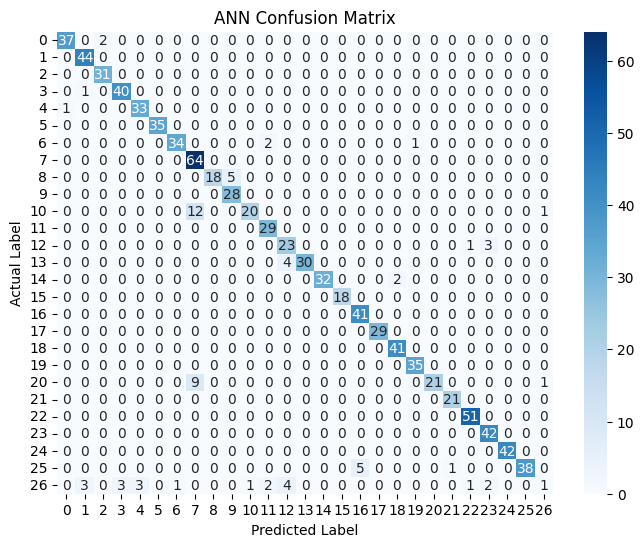

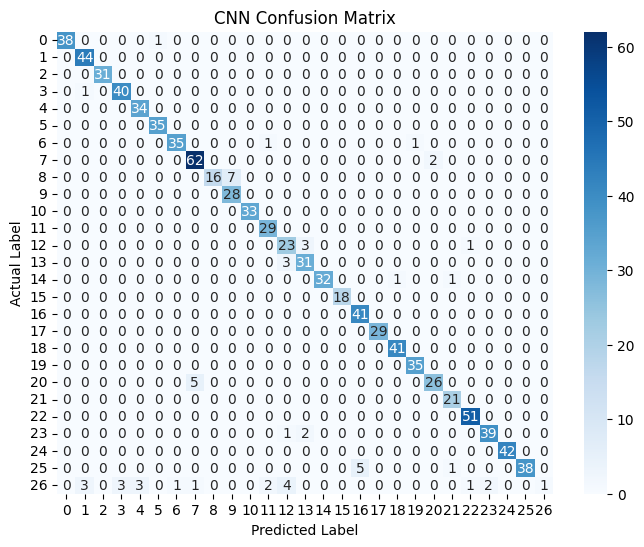

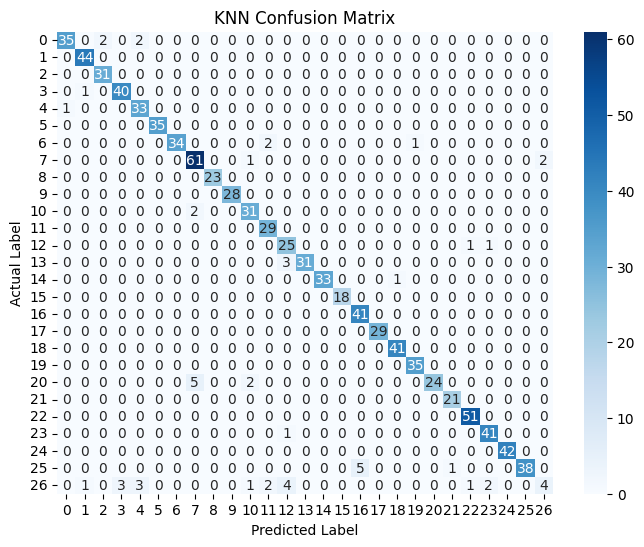

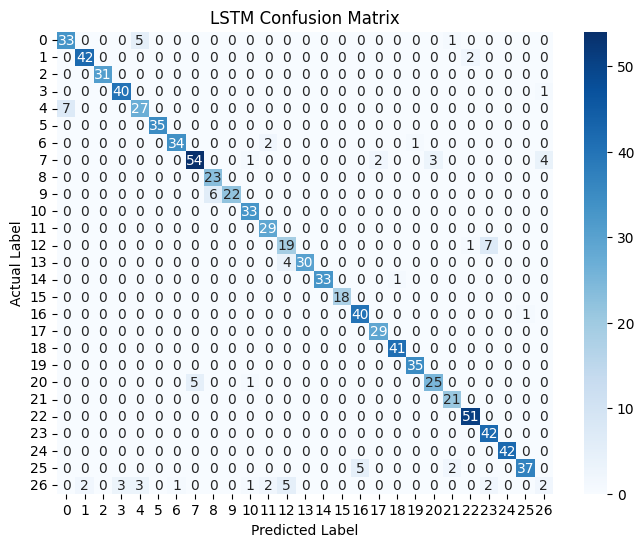

In [16]:
# Plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(cm_ann, "ANN Confusion Matrix")
plot_confusion_matrix(cm_cnn, "CNN Confusion Matrix")
plot_confusion_matrix(cm_knn, "KNN Confusion Matrix")
plot_confusion_matrix(cm_lstm, "LSTM Confusion Matrix")